### [CMU-Datasets](mocap.cs.cmu.edu/search.php)

* dataset: very diverse, contains data such as sport activities (soccer, dancing, etc), everyday movements/activities, locomotion (walk/run, jump, etc), interaction with environment and other agents, human subjects imitating animal behaviors (such as snake, dog, chicken, etc), stretching, finegrained movements, and so on.
* data: 3D joint positions and videos.

The CMU datasets is composed of '.asf/.amc' files. More info about the this file format can be found on this [link](http://research.cs.wisc.edu/graphics/Courses/cs-838-1999/Jeff/ASF-AMC.html).

To parse these files, we will need the `cgkit` module: http://cgkit.sourceforge.net/

The relevant documentation can be found here: http://cgkit.sourceforge.net/doc2/asfamc.html

Clone and install the following github repo: https://github.com/VanushVaswani/amcparser

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

from IPython.display import HTML

#%matplotlib inline
%matplotlib notebook

from amcparser.skeleton import Skeleton
from amcparser.motion import SkelMotion

In [2]:
PATH = 'data/CMU'

In [4]:
# Define some variables
links = ['upperback', 'rfoot', 'lradius', 'lthumb', 'rradius', 'lwrist', 'rhand', 'rhumerus',
        'lowerneck', 'lhand', 'ltibia', 'head', 'rwrist', 'lfingers', 'rtoes', 'lowerback',
        'lhipjoint', 'rhipjoint', 'lclavicle', 'upperneck', 'rfemur', 'thorax', 'rclavicle',
        'rtibia', 'lfoot', 'lhumerus', 'rthumb', 'rfingers', 'root', 'ltoes', 'lfemur']
Nl = len(links)

# File paths
skeleton_filename = PATH+'/02.asf'
motion_filename = PATH+'/02_01.amc'
#video_filename = PATH+'/02_01.avi'
framerate = 120.

# Create skeleton and motion
skel = Skeleton(skeleton_filename)
skelMot = SkelMotion(skel, motion_filename, (1./framerate))

# Compute all the trajectories
skelMot.traverse(None, 0, -1)

# Data
X_TO = np.array([skel.bones[jnt].xyz_data for jnt in ['head', 'upperneck', 'lowerneck',
                                                      'upperback', 'thorax', 'lowerback', 'root']])
X_RA = np.array([skel.bones[jnt].xyz_data for jnt in ['rclavicle', 'rhumerus', 'rradius',
                                                      'rwrist', 'rhand', 'rthumb', 'rfingers']])
X_LA = np.array([skel.bones[jnt].xyz_data for jnt in ['lclavicle', 'lhumerus', 'lradius',
                                                      'lwrist', 'lhand', 'lthumb', 'lfingers']])
X_RL = np.array([skel.bones[jnt].xyz_data for jnt in ['rhipjoint', 'rfemur', 'rtibia', 'rfoot', 'rtoes']])
X_LL = np.array([skel.bones[jnt].xyz_data for jnt in ['lhipjoint', 'lfemur', 'ltibia', 'lfoot', 'ltoes']])
X = np.vstack((X_TO, X_RA, X_LA, X_RL, X_LL))

100%|██████████| 343/343 [00:00<00:00, 585.49it/s]    | 51/343 [00:00<00:00, 509.01it/s]


<IPython.core.display.Javascript object>


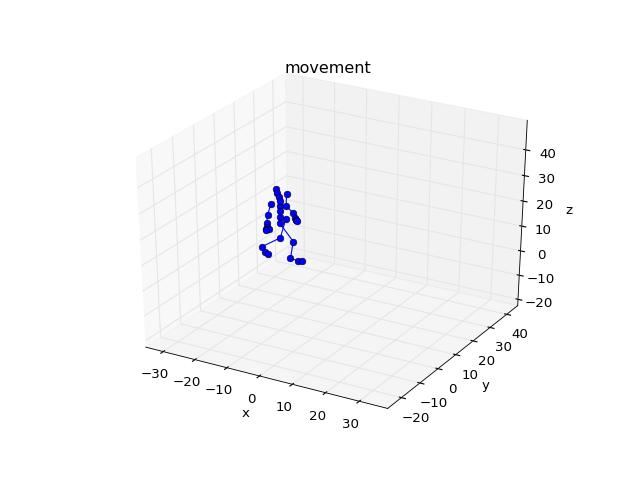

In [5]:
# Rescaling such that the skeleton it is in the right proportion and at the middle
xmin, xmax = X[...,2].min(), X[...,2].max()
ymin, ymax = X[...,0].min(), X[...,0].max()
zmin, zmax = X[...,1].min(), X[...,1].max()
x_len, y_len, z_len = (xmax - xmin), (ymax - ymin), (zmax - zmin)
max_len = max([x_len, y_len, z_len])
xmin, xmax = xmin + (x_len - max_len)/2., xmin + (x_len + max_len)/2.
ymin, ymax = ymin + (y_len - max_len)/2., ymin + (y_len + max_len)/2.
zmin, zmax = zmin + (z_len - max_len)/2., zmin + (z_len + max_len)/2.

# Plot trajectories
x,y,z = skel.bones['rhand'].xyz_data.T
T = len(x)

fig = plt.figure()
ax = fig.gca(projection='3d')

def init():
    ax.set_title('movement')
    ax.set_xlabel('x')
    ax.set_xlim(xmin, xmax)
    ax.set_ylabel('y')
    ax.set_ylim(ymin, ymax)
    ax.set_zlabel('z')
    ax.set_zlim(zmin, zmax)
    #ax.scatter(x[0], y[0], z[0], marker='o')
    return fig,

def animate(i):
    #ax.view_init(elev=10., azim=i)
    ax.scatter(x[i], y[i], z[i], marker='o')
    return fig,
    
def animate_skeleton(i):
    ax.clear()
    init()
    #ax.scatter(X[:,2,i], X[:,0,i], X[:,1,i], marker='o', c='b')
    for d in [X_TO, X_RA, X_LA, X_RL, X_LL]:
        ax.plot(d[:,i,2], d[:,i,0], d[:,i,1], marker='o', c='b')
    return fig,

# Animate
#anim = animation.FuncAnimation(fig, animate, init_func=init,
#                               frames=T, interval=20, blit=True)
anim = animation.FuncAnimation(fig, animate_skeleton, init_func=init,
                               frames=T, interval=20, blit=True)

plt.show()

<IPython.core.display.Javascript object>


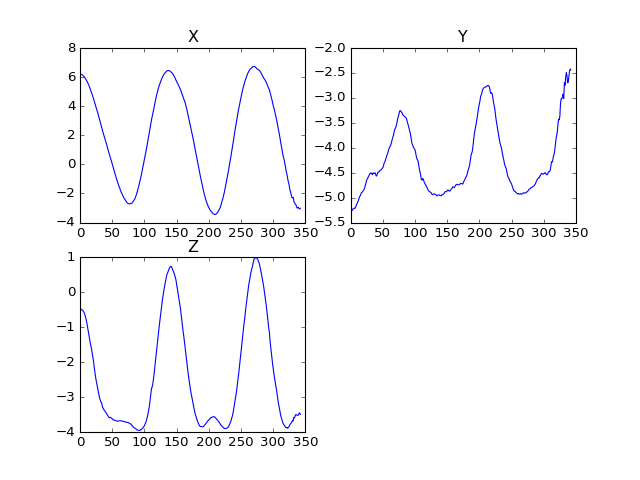

In [6]:
# Plot trajectory profiles
plt.figure()
plt.subplot(2,2,1)
plt.title('X')
plt.plot(range(T), X[11,:,2] - X[6,:,2])

plt.subplot(2,2,2)
plt.title('Y')
plt.plot(range(T), X[11,:,0] - X[6,:,0])

plt.subplot(2,2,3)
plt.title('Z')
plt.plot(range(T), X[11,:,1] - X[6,:,1])
plt.show()